## Road Lane Detection using OpenCV with Video

Using concepts, we will build lane detection project on image, we can use the same for videos. 

Create functions for all the process we did for image. For sequence of process follow document 21A and 21B.

In [2]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [3]:
#function to take two parameters img and lines vectors.
#fuction to draw the line on blank image of original image size and then merge with original image.

def draw_line(img, lines):
    
    #copy the input image into new image 
    copy_img = np.copy(img)
    
    #create blank image matches original image size
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) 
    
    #we will loop these line vectors and draw the lines
    for line in lines:
        
        #line(in for loop) will give four coordinates,coordinate of 1st point on line and coordinate 2nd point.
        for x1, y1, x2, y2 in line:
            
            #draw line on blank image and merge it on original image
            cv.line(blank_image, (x1,y1), (x2,y2), (0,255,0), thickness=3)
    
    #merge the blank image with lines now with original image. function to merge two images.
    #values:(org.imge, alpha_value(wt. to image we provide),2nd image, beta_value, gamma_value)
    img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0)
    
    return(img)
    

In [4]:
def region_of_interest(img, vertices):
    
    #blank image
    mask = np.zeros_like(img)
    
    #color channel same as image
    #since we will be passing greyscale image of channel 1 to find ROI, we can comment this code.
    #channel_count = img.shape[2]
    
    #create color mask
    #also, since channel count is 1, we will have mask color as 255.
    match_mask_color = 255
                        
    #fill everything except area of interest
    cv.fillPoly(mask, vertices, match_mask_color)
    
    #overlay mask image on image and return ONLY common area
    masked_image = cv.bitwise_and(img, mask)
    
    return masked_image
    

In [11]:
#define the function to read the video file and then perform task inside the fuunction.

def process(image):
    
    #print(image.shape)
    
    # we read the image from top(0) to bottom(704) for height and left to right for width
    height = image.shape[0]
    width = image.shape[1]
    
    #region_of interest variable
    region_of_interest_vertices = [(0,height), (width/2,height/2), (width, height)]
    
    # we create the greyscale of original image, and pass that to canny edge detection
    image_mask_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
    
    #apply canny edge detection to image
    canny_image = cv.Canny(image_mask_gray, 20, 200)
    
    #vertices will be the region_of_interest variable will pass using numpy array method.
    cropped_image = region_of_interest(canny_image, 
                                   np.array([region_of_interest_vertices], np.int32))
    
    #We use Probalistic Hough Line
    lines = cv.HoughLinesP(cropped_image,
                          rho = 6,
                          theta = np.pi/60,
                          threshold = 50,
                          lines = np.array([]),
                          minLineLength = 40,
                          maxLineGap = 25)
    
    
    image_with_lines = draw_line(image, lines)
    
    #return the final image
    return(image_with_lines)

In [12]:
#load an image

cap = cv.VideoCapture('road.mp4')

In [13]:
#check if we have the video

while (cap.isOpened()):
    
    ret,frame = cap.read()
    
    frame = process(frame)
    
    cv.imshow('road_with_lines',frame)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

-1

In [9]:
# we create the greyscale of original image, and pass that to canny edge detection

image_mask_gray = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY) #converting to greyscale

In [11]:
# we read the image from top(0) to bottom(704) for height and left to right for width

height = image_rgb.shape[0]
width = image_rgb.shape[1]

print(height)
print(width)

704
1279


#### Area of interest is the bottom triangl which has lane marking

we need to define region of interest vertices. We will provide 3 point of interest, Left botton(0,704) right bottom and somewhere in middle where the lane is lines appear to be merging at center(approx 600,300)

In [12]:
#region_of interest variable

region_of_interest_vertices = [(0,height), (width/2,height/2), (width, height)]
print(region_of_interest_vertices)

[(0, 704), (639.5, 352.0), (1279, 704)]


### Apply Canny Edge detection to grey scale image

In [45]:
# coping code from below as we DONNOT want canny to find edges of mask, also pass original image.

canny_image = cv.Canny(image_mask_gray, 20, 200) 

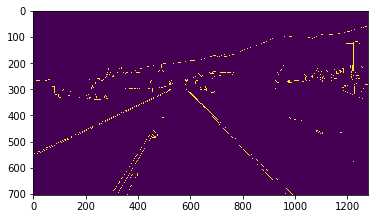

In [46]:
plt.imshow(canny_image)

#### Mask ever other region outside region of interest :

we create the fuction for region of interest, which will take input image and vertices.
1. define a mask variable as blank matrix that matches the  image height and width.
2. retrive number of color channel, from the image.shape
3. create a match color using the same color channel count
4. Fill inside the polygon using fill polly method, as we have region of interest and mask every other thing on image outside region of interest. values:(image(mask), vertices(points),color)
5. Return the image where ONLY mark pixels matches, using bitwise_AND method. values(image, mask)

So basically, we apply region of interest using this method aand we get region where other area will me masked

In [27]:
def region_of_interest(img, vertices):
    
    #blank image
    mask = np.zeros_like(img)
    
    #color channel same as image
    #since we will be passing greyscale image of channel 1 to find ROI, we can comment this code.
    #channel_count = img.shape[2]
    
    #create color mask
    #also, since channel count is 1, we will have mask color as 255.
    match_mask_color = 255
                        
    #fill everything except area of interest
    cv.fillPoly(mask, vertices, match_mask_color)
    
    #overlay mask image on image and return ONLY common area
    masked_image = cv.bitwise_and(img, mask)
    
    return masked_image
    

### Now, use the above function to mask original image.

In [28]:
#pass our image to the function and save it as masked image, and 
#vertices will be the region_of_interest variable will pass using numpy array method.

cropped_image = region_of_interest(canny_image, 
                                   np.array([region_of_interest_vertices], np.int32))

In [32]:
cv.imshow('masked image', cropped_image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

In [33]:
cropped_image.shape

(704, 1279)

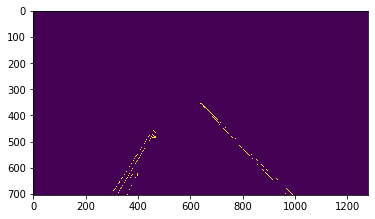

In [39]:
plt.imshow(cropped_image)

## Part 2 - Identify lines on Road using Line Detection

We will use Probabilitstic Hough Transformation, as we worked earlier on Suduko image.Hough Line Transform will draw lines on edge detected lines from canny edge detected image.

In [52]:
#We use Probalistic Hough Line
#values:(image, rho, theta, threshold)
#refer the 21A. document for more details

lines = cv.HoughLinesP(cropped_image,
                      rho = 6,
                      theta = np.pi/60,
                      threshold = 50,
                      lines = np.array([]),
                      minLineLength = 40,
                      maxLineGap = 25)

#### After applying hough line transform, it will return the line vector of all the lines which are detected inside the image. Next we will get the x, y coordinate from the lines.

#### Now we can create function to draw the line using lines vectors

In [53]:
#function to take two parameters img and lines vectors.
#fuction to draw the line on blank image of original image size and then merge with original image.

def draw_line(img, lines):
    
    #copy the input image into new image 
    copy_img = np.copy(img)
    
    #create blank image matches original image size
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) 
    
    #we will loop these line vectors and draw the lines
    for line in lines:
        
        #line(in for loop) will give four coordinates,coordinate of 1st point on line and coordinate 2nd point.
        for x1, y1, x2, y2 in line:
            
            #draw line on blank image and merge it on original image
            cv.line(blank_image, (x1,y1), (x2,y2), (0,255,0), thickness=3)
    
    #merge the blank image with lines now with original image. function to merge two images.
    #values:(org.imge, alpha_value(wt. to image we provide),2nd image, beta_value, gamma_value)
    img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0)
    
    return(img)
    
    

In [54]:
#call the fuction after prob. hough line transformation, and have the vectors.
#function to draw

image_with_lines = draw_line(image, lines)

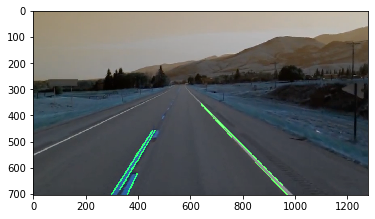

In [55]:
#view the result

plt.imshow(image_with_lines)

In [57]:
cv.imshow('final_image', image_with_lines)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1